<a href="https://colab.research.google.com/github/theekshana2000/Food-Calorie-Estimate-Using-Image-Processing/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/calories_estimation

/content/drive/MyDrive/calories_estimation


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import math
import shutil

# food segment

In [ ]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/225.8 GB disk)


## food classification


In [ ]:
# Define a list of class names
class_names = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist', 'grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach', 'pear', 'plum', 'qiwi', 'sachima', 'tomato']

# Load the saved model
model = tf.keras.models.load_model('food_classifier.h5')

# Load an image to classify

test_path = 'test_image'

if os.path.exists(test_path):
    shutil.rmtree(test_path)

os.mkdir(test_path)

src_file = '/content/drive/MyDrive/JPEGImages/validation/apple/apple003T(1) - Copy.JPG'
img = src_file.split('/')[-1]
dst_file = f'/content/drive/MyDrive/calories_estimation/test_image/{img}'

shutil.copy(src_file, dst_file)

img = image.load_img(dst_file, target_size=(150, 150))

# Convert the image to a numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Normalize the pixel values
x = x / 255.0

# Get the predicted class probabilities
probs = model.predict(x)

# Get the predicted class index
predicted_class = np.argmax(probs)

# Get the actual name of the predicted class
class_name = class_names[predicted_class]

# Print the predicted class name and probabilities
print(f"Predicted class: {class_name}")

# Get the position of food in the list
food_position = class_names.index(class_name) + 1
food_position

1/1 [==============================] - 0s 102ms/step
Predicted class: apple


1

# Area Estimate

In [ ]:
output_path = 'runs'

if os.path.exists(output_path):
    shutil.rmtree(output_path)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/calories_estimation/training_results/food2/weights/best.pt conf=0.6 source=/content/drive/MyDrive/calories_estimation/test_image save=True save_crop=True save_txt=True

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 68143791 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/calories_estimation/test_image/apple003T(1) - Copy.JPG: 480x640 1 coin, 1 apple, 3332.4ms
Speed: 4.0ms preprocess, 3332.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


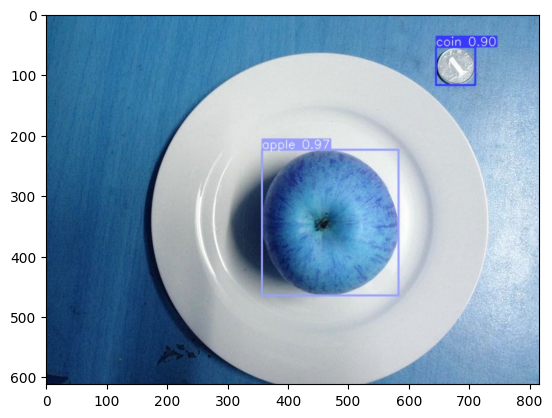

In [ ]:
image_name = dst_file.split('/')[-1]
output = "/".join(["runs/detect/predict", image_name])

img = cv2.imread(output)
plt.imshow(img)
plt.show()

apple
runs/detect/predict/crops/apple
runs/detect/predict/crops/apple/apple003T(1) - Copy.jpg


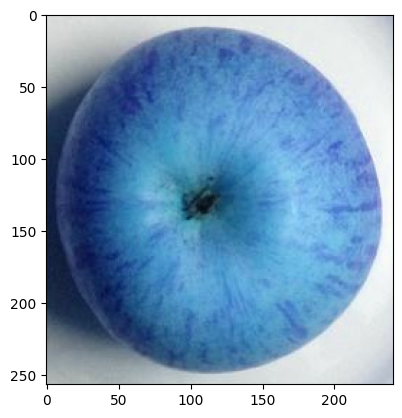

In [ ]:
for folder in os.listdir("runs/detect/predict/crops"):
  if folder != "coin":
    print(folder)
    food_folder_path = os.path.join("runs/detect/predict/crops", folder)
    print(food_folder_path)

    for file in os.listdir(food_folder_path):
      food_path = os.path.join(food_folder_path, file)

      print(food_path)

      img = cv2.imread(food_path)
      plt.imshow(img)
      plt.show()

runs/detect/predict/crops/coin/apple003T(1) - Copy.jpg


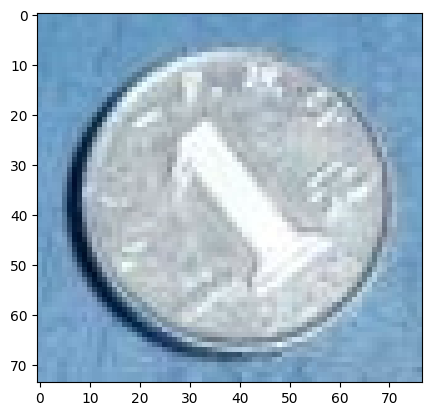

In [ ]:
for file in os.listdir("runs/detect/predict/crops/coin"):
  coin_path = os.path.join("runs/detect/predict/crops/coin", file)
  print(coin_path)

  img = cv2.imread(coin_path)
  plt.imshow(img)
  plt.show()

In [ ]:
food_path, coin_path

('runs/detect/predict/crops/apple/apple003T(1) - Copy.jpg',
 'runs/detect/predict/crops/coin/apple003T(1) - Copy.jpg')

(257, 241, 3)
The area of the foreground object is: 41687


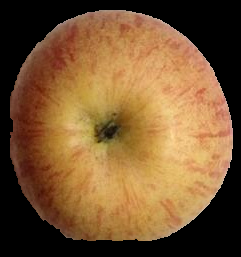

61937


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(food_path)
print(img.shape)

# Define the rectangle that encloses the object of interest
rect = (10, 10, img.shape[0]-5, img.shape[1]-10)

# Create a mask with the same shape as the input image
mask = np.zeros(img.shape[:2], np.uint8)

# Set the background and foreground pixels
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply the grabCut function
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a mask where all probable foreground and definite foreground pixels are set to 1, otherwise 0
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the input image
output = cv2.bitwise_and(img, img, mask=mask2)

# Calculate the area of the foreground object
foreground_area_food = cv2.countNonZero(mask2)

print("The area of the foreground object is:", foreground_area_food)

# Display the output
cv2_imshow(output)
cv2.waitKey(0)
cv2.destroyAllWindows()

food_size = img.shape[0]*img.shape[1]
print(food_size)

(74, 77, 3)
The area of the foreground object is: 3077


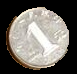

5698


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(coin_path)
print(img.shape)

# Define the rectangle that encloses the object of interest
rect = (5, 5, img.shape[0]-5, img.shape[1]-5)

# Create a mask with the same shape as the input image
mask = np.zeros(img.shape[:2], np.uint8)

# Set the background and foreground pixels
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply the grabCut function
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a mask where all probable foreground and definite foreground pixels are set to 1, otherwise 0
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the input image
output = cv2.bitwise_and(img, img, mask=mask2)

# Calculate the area of the foreground object
foreground_area_coin = cv2.countNonZero(mask2)

print("The area of the foreground object is:", foreground_area_coin)

# Display the output
cv2_imshow(output)
cv2.waitKey(0)
cv2.destroyAllWindows()

coin_size = img.shape[0]*img.shape[1]
print(coin_size)

In [ ]:
Acual_coin_area = math.pi*math.pow(2.5/2, 2)

print(foreground_area_coin,Acual_coin_area)

Acual_food_area = (Acual_coin_area/foreground_area_coin)*foreground_area_food
Acual_food_area      # area in cm^2

3077 4.908738521234052


66.5032768068521

In [ ]:
food_area = Acual_coin_area * food_size/coin_size
food_area

53.357763739851436

# Mass & Calery estimation

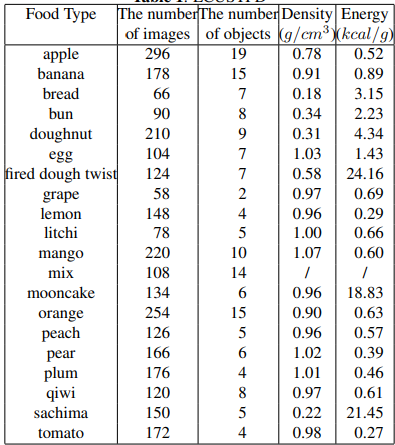

In [ ]:
#density - gram / cm^3
density_dict = { 1:0.786, 2:0.917, 3:0.184,  4:0.342, 5:0.308, 6:1.161, 7:0.614, 8:0.967, 9:0.959, 10:998, 11:1.075, 12:0.955, 13:0.926, 14:0.951, 15:1.022, 16:1.006, 17:0.973, 18:0.218, 19:0.984}
#kcal
calorie_dict = { 1:0.52, 2:0.89,  3:3.15, 4:2.23, 5:4.34, 6:1.43, 7:24.16, 8:0.69, 9:0.29, 10:0.66, 11:0.60, 12:18.83, 13:0.63, 14:0.57, 15:0.39, 16:0.46, 17:0.61, 18:21.45, 19:0.27}
#skin of photo to real multiplier
skin_multiplier = 5*2.3

def getCalorie(label, volume): #volume in cm^3
	calorie = calorie_dict[int(label)]     # (kcal/g)
	density = density_dict[int(label)]     # (g/cm^3)
	mass = volume*density*1.0              # g (total mass)
	calorie_tot = calorie*mass             # kcal (total calorie)
	return mass, calorie_tot, calorie # calorie per 100 grams

def getVolume(label, Acual_food_area):
    area_food = Acual_food_area # area in cm^2
    label = int(label)
    volume = 100

    # sphere - apple(1), lemon(9), litchi(10), orange(13), peach(14), pear(15), plum(16), tomato(19)
    if label == 1 or label == 9 or label == 10 or label == 13 or label == 14 or label == 15 or label == 16 or label == 19 :
        radius = np.sqrt(area_food/np.pi)
        volume = (4/3)*np.pi*radius*radius*radius
        print (area_food, radius, volume)

    # circle like doughnut(5)
    if label == 5:
        top_area = Acual_food_area
        outer_radius = math.sqrt(top_area / math.pi)
        inner_radius = outer_radius / 2
        volume = 2 * math.pi**2 * ((inner_radius + outer_radius) / 2) * (outer_radius - inner_radius)
        print("The volume of the doughnut is", round(volume, 2), "cm^3.")

    # cylinder like banana(2)
    # if label == 2:
    #     food_rect = cv2.minAreaRect(food_contour)
    #     height = max(food_rect[1])*pix_to_cm_multiplier
    #     radius = area_food/(2.0*height)
    #     volume = np.pi*radius*radius*height

    # oval - egg(6), mango(11), qiwi(17)
    if label == 6 or label == 11 or label == 17:
        area = Acual_food_area
        radius = math.sqrt(area / math.pi)
        a = 2 * radius
        b = area / (math.pi * a)
        b *= 2
        volume = (4/3) * math.pi * a * (b/2)**2
        print("The volume of the oval shape is", round(volume, 2), "cm^3.")

    # cylinder like mooncake(12)
    if label == 12:
        area = Acual_food_area
        height = 2 # cm
        radius = math.sqrt(area / math.pi)
        diameter = 2 * radius
        volume = math.pi * (diameter / 2)**2 * height
        print("The volume of the mooncake is", round(volume, 2), "cm^3.")

    # rect - bread(3)
    if label == 3:
        area = Acual_food_area
        height = 1    # 1cm
        volume = area * height
        print("The volume of the slice of bread is", round(volume, 2), "cm^3.")

     # rect - sachima(18)
    if label == 18:
        area = Acual_food_area
        height = math.sqrt(area)/2
        volume = area * height
        print("The volume of the sachima is", round(volume, 2), "cm^3.")

    return volume

def calories():
    # img_path =img # "C:/Users/M Sc-2/Desktop/dataset/FooD/"+str(j)+"_"+str(i)+".jpg"
    volume = getVolume(food_position, Acual_food_area)
    mass, cal, cal_100 = getCalorie(food_position, volume)
    food_volumes=volume
    food_calories=cal
    food_calories_100grams=cal_100
    food_mass=mass
    print("\nfood_volumes",food_volumes,"\nfood_calories",food_calories,"\nfood_calories_1grams",food_calories_100grams,"\nfood_mass",food_mass)
    return food_calories

In [ ]:
getVolume(food_position, Acual_food_area)

66.5032768068521 4.600940172534112 407.9701304877359


407.9701304877359

In [ ]:
cal = round(calories(), 2)
cal

66.5032768068521 4.600940172534112 407.9701304877359

food_volumes 407.9701304877359 
food_calories 166.74555173294743 
food_calories_1grams 0.52 
food_mass 320.66452256336044


166.75

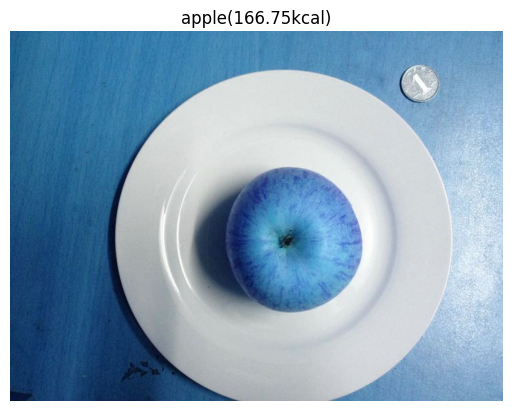

In [ ]:
 img=cv2.imread(dst_file)
plt.imshow(img)
plt.title('{}({}kcal)'.format(class_name,cal))
plt.axis('off')
plt.show()